(0, array([ 0.07820791], dtype=float32), array([ 0.4984903], dtype=float32))
(20, array([ 0.07096638], dtype=float32), array([ 0.31802541], dtype=float32))
(40, array([ 0.09194707], dtype=float32), array([ 0.30499965], dtype=float32))
(60, array([ 0.09776641], dtype=float32), array([ 0.30138671], dtype=float32))
(80, array([ 0.09938047], dtype=float32), array([ 0.30038464], dtype=float32))
(100, array([ 0.09982817], dtype=float32), array([ 0.3001067], dtype=float32))
(120, array([ 0.09995234], dtype=float32), array([ 0.30002961], dtype=float32))
(140, array([ 0.09998678], dtype=float32), array([ 0.30000821], dtype=float32))
(160, array([ 0.09999633], dtype=float32), array([ 0.30000231], dtype=float32))
(180, array([ 0.09999897], dtype=float32), array([ 0.30000067], dtype=float32))
(200, array([ 0.0999997], dtype=float32), array([ 0.30000019], dtype=float32))


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


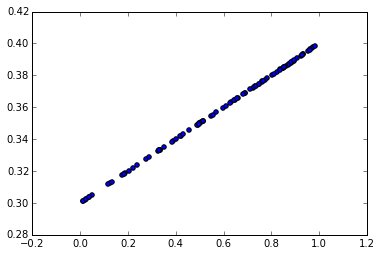

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

plt.scatter(x_data,y_data)

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

# Learns best fit is W: [0.1], b: [0.3]